In [10]:
from dataset import *
# from ..main import get_opt
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [11]:
def imshow(input):
    """ Imshow for Tensor"""
    print(input.shape)
    # input = input.numpy(dtype=np.float32).transpose((2, 3, 1, 0))
    input = input.numpy().transpose((1, 2, 0))
    print(input.shape)
    input = input*0.5 + 0.5
    input = np.squeeze(input)
    # print(input)
    input = np.clip(input, 0, 1)
    plt.imshow(input, cmap = 'gray')
    plt.show()


In [12]:
def dataloader():

    mask_path = '../dataset_lungseg/masks/'
    img_path = '../dataset_lungseg/images/'
    mask_list = os.listdir(mask_path)
    img_mask_list = [(mask_names.replace('_mask',''), mask_names) for mask_names in mask_list]

    train_list, test_list = train_test_split(img_mask_list, test_size = 0.2, random_state = 42) 
    train_list, val_list = train_test_split(train_list,test_size = 0.1, random_state = 42)
    # print(len(train_list), len(val_list), len(test_list)) # 506, 57, 141
    # print(train_list)

    train_set = LungDataset(train_list, img_path, mask_path, transform = (image_t, mask_t))
    val_set = LungDataset(val_list, img_path, mask_path, transform = (image_t, mask_t))
    test_set = LungDataset(test_list, img_path, mask_path, transform = (image_t, mask_t))

    loader ={
        'train' : DataLoader(
            train_set, 
            batch_size= 4,
            shuffle=True
        ),
        'val' : DataLoader(
            val_set, 
            batch_size=4,
            shuffle=True
        ),
        'test' : DataLoader(
            test_set, 
            batch_size=4,
            shuffle=True
        )
    }   
    return loader

torch.Size([1, 224, 224])
torch.Size([1, 224, 224])
(224, 224, 1)


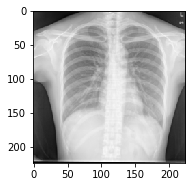

torch.Size([1, 224, 224])
(224, 224, 1)


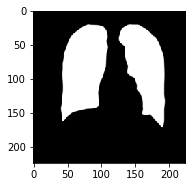

In [13]:
mask_path = '../dataset_lungseg/masks/'
img_path = '../dataset_lungseg/images/'
mask_list = os.listdir(mask_path)
img_mask_list = [(mask_names.replace('_mask',''), mask_names) for mask_names in mask_list]

train_set = LungDataset(img_mask_list, img_path, mask_path, transform = (image_t, mask_t))
# train_set = dataloader()['train']
image, mask = next(iter(train_set))
print(image.shape)
# print(torch.max(image))
# print(image.min())
# print(mask.max())
# print(mask.min())

plt.subplot(1,2,1)
imshow(image)

plt.subplot(1,2,2)
imshow(mask)

# print(mask)